In [1]:
from pylab import *
# import nylib, nylib2, cjlib
import bloch

# simulate Z-spectrum under different B1 and B0

In [2]:
cestFreq = linspace(-6,6,121)

satPulse = zeros((1, 3))
# phase
satPulse[0,0] = 0
# B1
satPulse[0,1] = 0*42.57
# duration time
satPulse[0,2] = 4

# define pools
freewater = bloch.Pool('freewater', t1 = 1.6, t2 = 0.062, lifetime = 1., chemical_shift = -0.0001, concentration = 111200)
macromolecular = bloch.Pool('macromolecular', t1 = 1, t2 = 9e-6, lifetime = 1/40., chemical_shift = 0.0001, concentration = 5500.)
amide = bloch.Pool('amide', t1 = 1, t2 = 0.1, lifetime = 1/30., chemical_shift = 3.5, concentration = 72.)
amine = bloch.Pool('amine', t1 = 1, t2 = 0.2, lifetime = 1/5500., chemical_shift = 3.0, concentration = 20.)
guanidinium = bloch.Pool('guanidinium', t1 = 1, t2 = 0.17, lifetime = 1/1100., chemical_shift = 2.0, concentration = 20.)
pcr_1 = bloch.Pool('pcr_1', t1 = 1, t2 = 0.1, lifetime = 1/120., chemical_shift = 1.95, concentration = 10.)
pcr_2 = bloch.Pool('pcr_2', t1 = 1, t2 = 0.1, lifetime = 1/260., chemical_shift = 2.6, concentration = 10.)
hydroxyl = bloch.Pool('hydroxyl', t1 = 1, t2 = 0.055, lifetime = 1/2000., chemical_shift = 0.9, concentration = 45.)
noe_1 = bloch.Pool('noe_1', t1 = 1, t2 = 0.005, lifetime = 1/20., chemical_shift = -3.5, concentration = 100.)
# noe_2 = bloch.Pool('noe_2', t1 = 1, t2 = 0.005, lifetime = 1/16., chemical_shift = -2.25, concentration = 100.)
# noe_3 = bloch.Pool('noe_3', t1 = 1, t2 = 0.005, lifetime = 1/16., chemical_shift = -2.75, concentration = 100.)
# noe_4 = bloch.Pool('noe_4', t1 = 1, t2 = 0.005, lifetime = 1/16., chemical_shift = -3.25, concentration = 100.)
# noe_5 = bloch.Pool('noe_5', t1 = 1, t2 = 0.005, lifetime = 1/16., chemical_shift = -3.75, concentration = 100.)




In [3]:
pools = (freewater, amide, amine, guanidinium, pcr_1, pcr_2, hydroxyl, noe_1, macromolecular)



# 11.7T

In [4]:
B1 = r_[0.5, 1, 1.5, 2]
simulationMatrixCest = zeros((len(B1), len(cestFreq)))

for ii in range(len(B1)):
    print ii
    satPulse[0,1] = B1[ii]*42.57
    simulationMatrixCest[ii] = bloch.solve(pools, cestFreq, satPulse, crusher=False, magnetic_field=11.7,pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools),:,-1]
    
    

0
1
2
3


Text(0,0.5,'S/S$_0$ (%)')

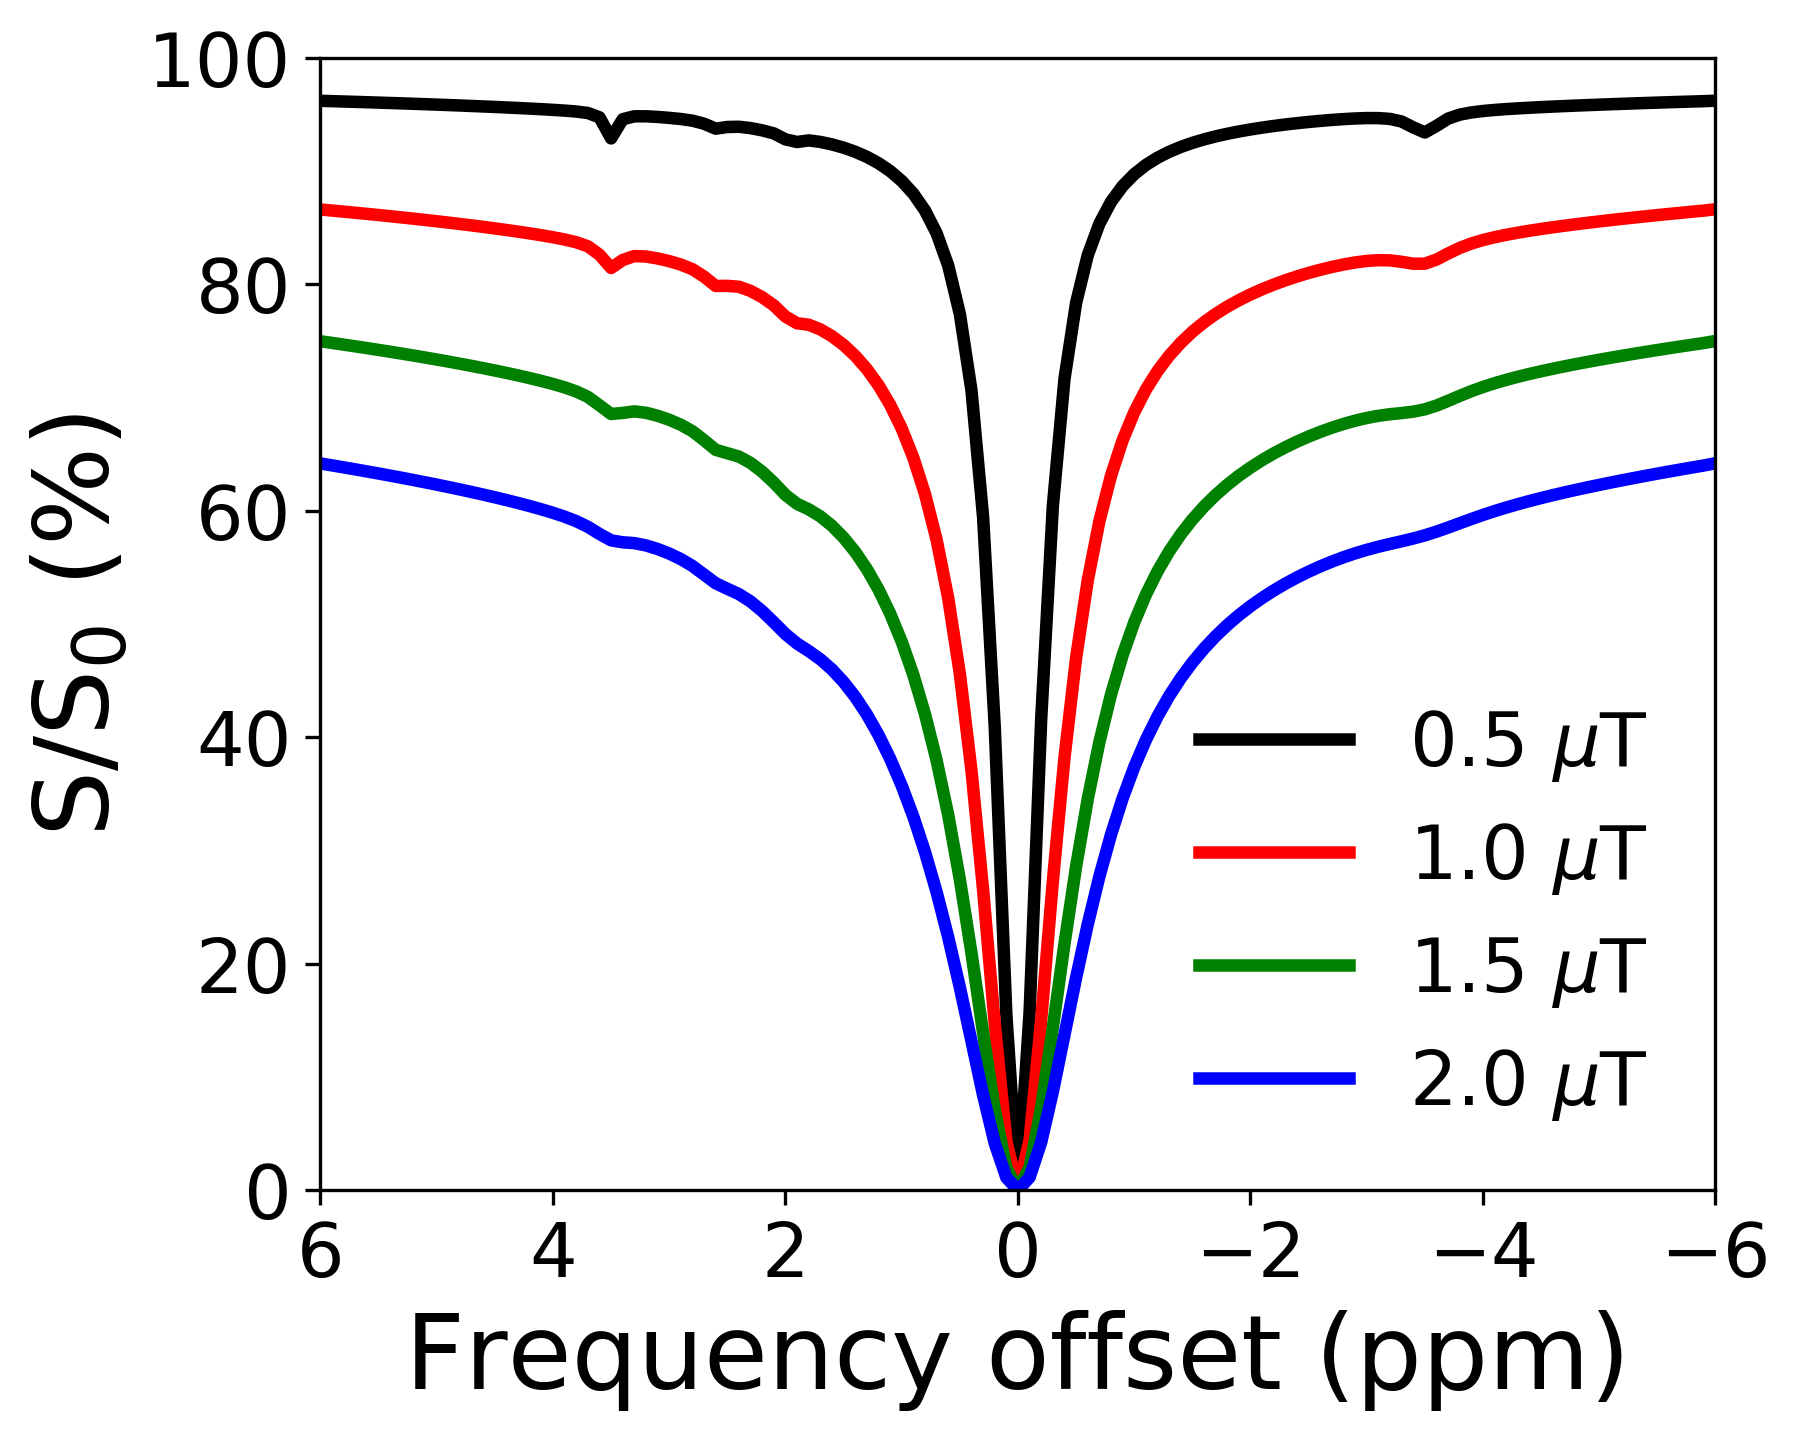

In [5]:
figure(figsize=(6,5),dpi=300)
plot(cestFreq,simulationMatrixCest[0]*100,'k-',linewidth=3, label=r'0.5 $\mu$T')
plot(cestFreq,simulationMatrixCest[1]*100,'r-',linewidth=3, label=r'1.0 $\mu$T')
plot(cestFreq,simulationMatrixCest[2]*100,'g-',linewidth=3, label=r'1.5 $\mu$T')
plot(cestFreq,simulationMatrixCest[3]*100,'b-',linewidth=3, label=r'2.0 $\mu$T')
xlim(cestFreq.max(), cestFreq.min())
ylim(0,100)
tick_params(labelsize=18)
legend(loc='lower right',frameon=False, fontsize=18)
xlabel('Frequency offset (ppm)',fontsize=25)
xticks([6, 4, 2, 0, -2, -4, -6])
# xticks([6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=25)

# zoom in

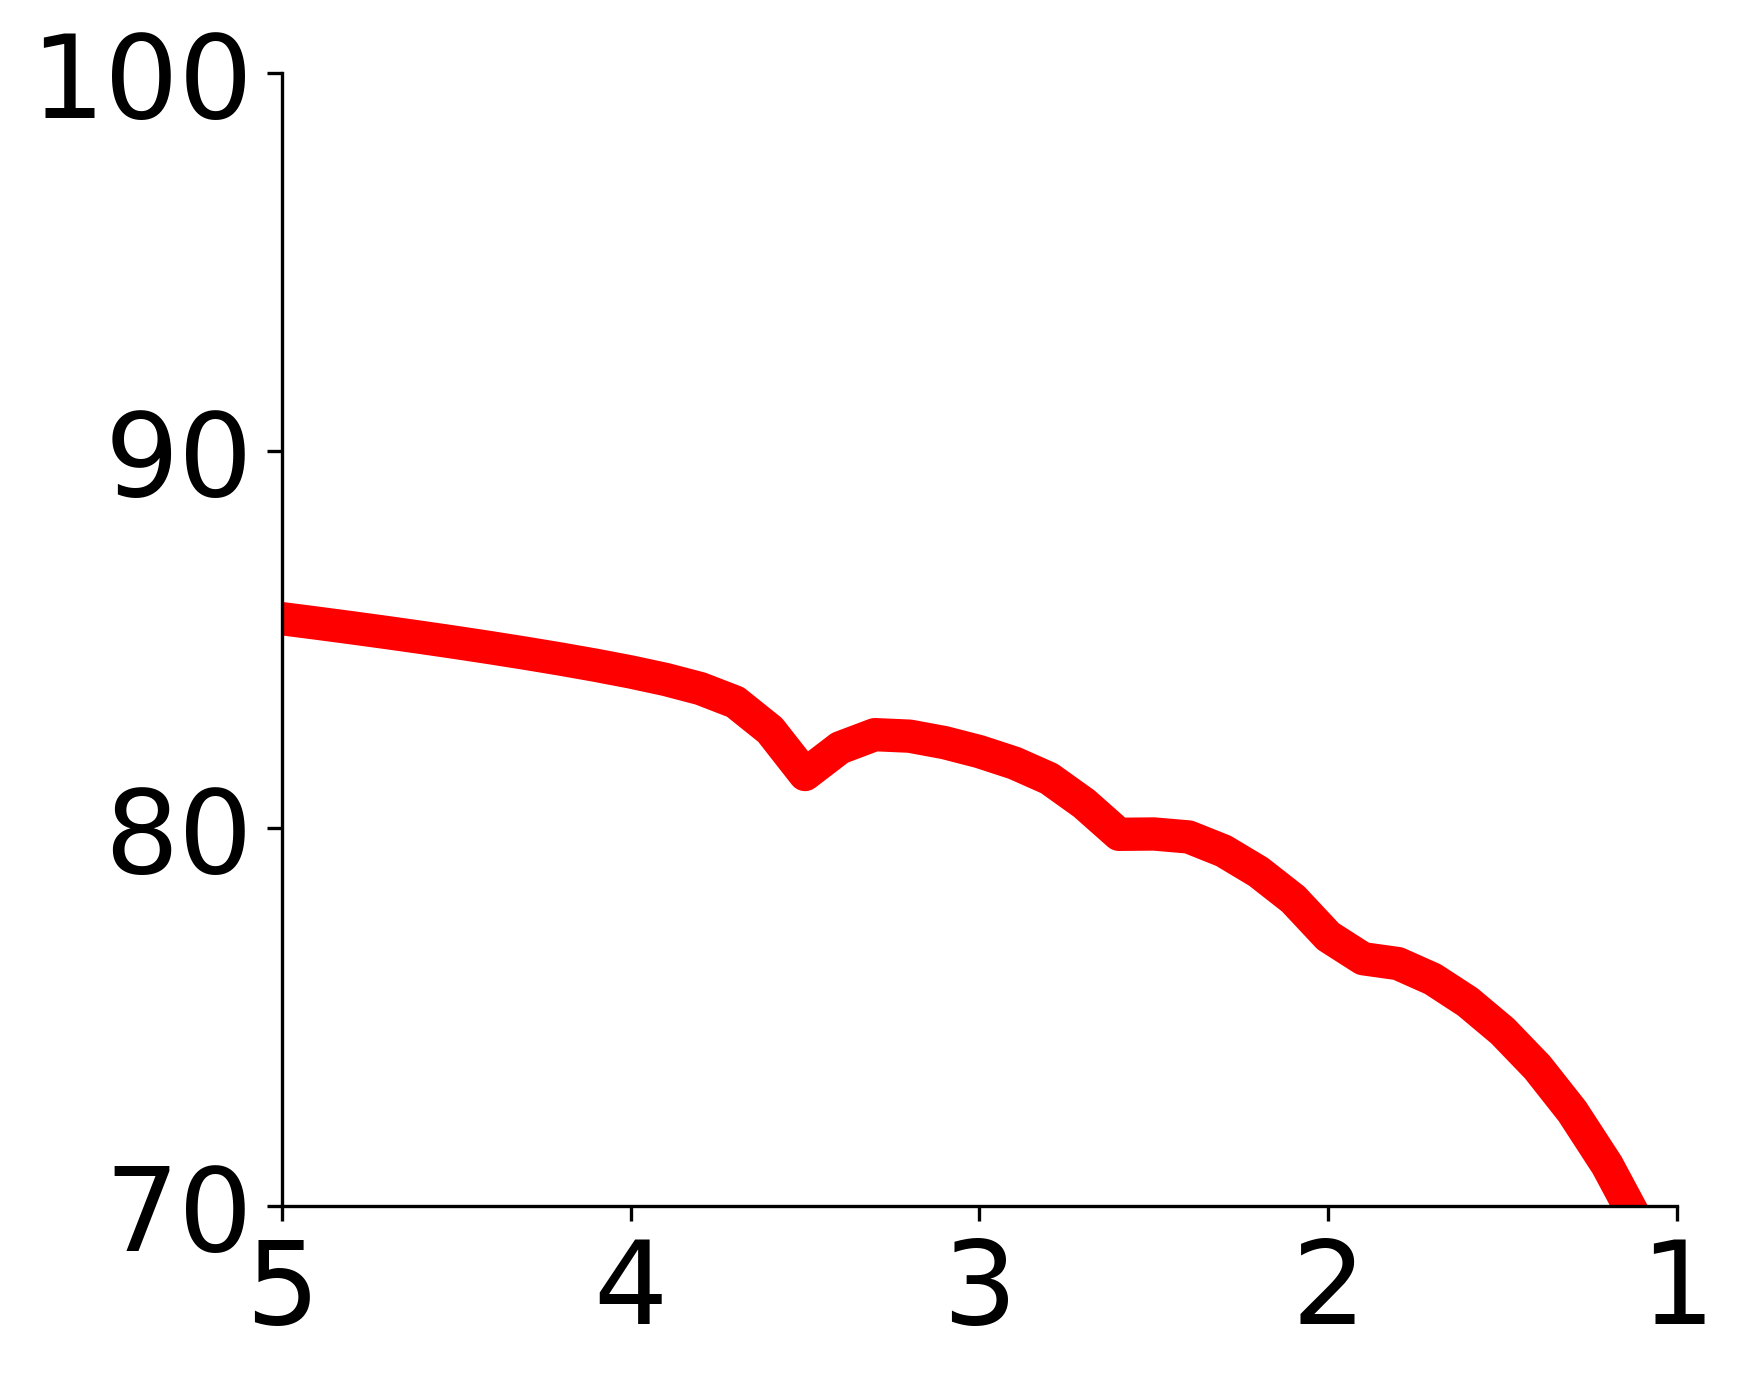

In [6]:
plt.figure(figsize=(6,5),dpi=300)
plt.plot(cestFreq,simulationMatrixCest[1]*100,'r-',linewidth=8, label=r'1.0 $\mu$T')
xlim(5, 1)
ylim(70,100)
tick_params(labelsize=28)
plt.tick_params(axis='x', which='both', bottom=True,
                top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', right=False,
                left=True, labelleft=True)

# legend(loc='lower right',frameon=False, fontsize=18)
# xlabel('Saturation Frequency (ppm)',fontsize=25)
# xticks([6, 4, 2, 0, -2, -4, -6])
xticks([ 5, 4, 3, 2, 1])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
# ylabel('S/S$_0$ (%)',fontsize=25)

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
    
for pos in [ 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(True)


# plt.savefig("blowup.png", transparent=True)
# save the plot as a PNG image with Transparent background
plt.savefig("blowup.png", transparent=True)

plt.show()

# 7T

In [7]:
B1 = r_[0.5,1,1.5,2]
simulationMatrixCest = zeros((len(B1), len(cestFreq)))

for ii in range(len(B1)):
    print ii
    satPulse[0,1] = B1[ii]*42.57
    simulationMatrixCest[ii] = bloch.solve(pools, cestFreq, satPulse, crusher=False, magnetic_field=7,pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools),:,-1]
    
    

0
1
2
3


Text(0,0.5,'S/S$_0$ (%)')

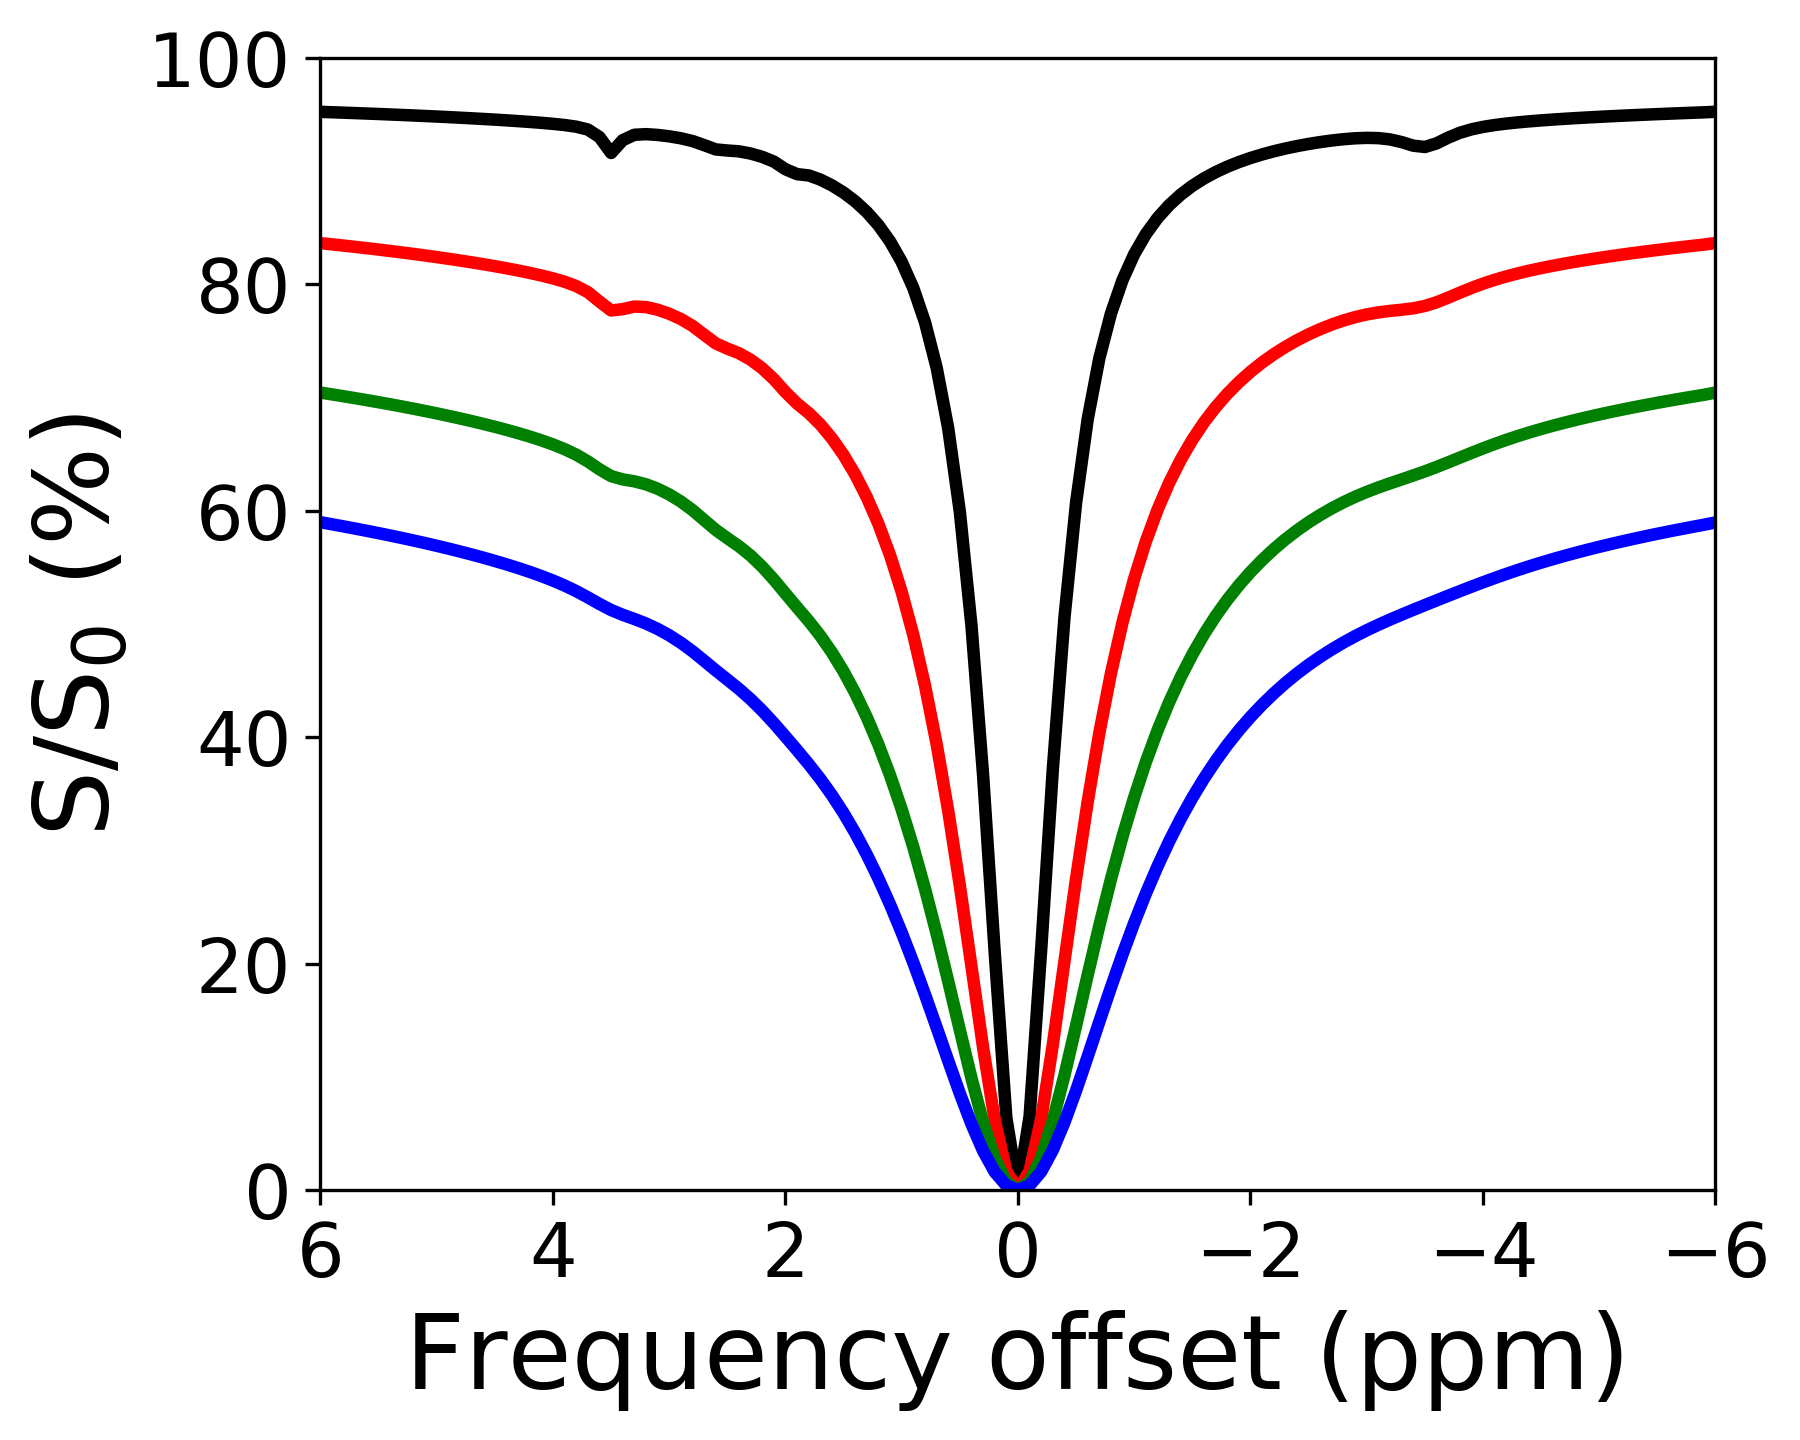

In [8]:
figure(figsize=(6,5),dpi=300)
plot(cestFreq,simulationMatrixCest[0]*100,'k-',linewidth=3, label=r'0.5 $\mu$T')
plot(cestFreq,simulationMatrixCest[1]*100,'r-',linewidth=3, label=r'1.0 $\mu$T')
plot(cestFreq,simulationMatrixCest[2]*100,'g-',linewidth=3, label=r'1.5 $\mu$T')
plot(cestFreq,simulationMatrixCest[3]*100,'b-',linewidth=3, label=r'2.0 $\mu$T')
xlim(cestFreq.max(), cestFreq.min())
ylim(0,100)
tick_params(labelsize=18)
# legend(loc='lower right',frameon=False, fontsize=18)
xlabel('Frequency offset (ppm)',fontsize=25)
xticks([6, 4, 2, 0, -2, -4, -6])
# xticks([6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=25)

# 3T

In [9]:
B1 = r_[0.5,1,1.5,2]
simulationMatrixCest = zeros((len(B1), len(cestFreq)))

for ii in range(len(B1)):
    print ii
    satPulse[0,1] = B1[ii]*42.57
    simulationMatrixCest[ii] = bloch.solve(pools, cestFreq, satPulse, crusher=False, magnetic_field=3,pulse_repeat = 1, post_dynamic_delay=5)[2*len(pools),:,-1]
    
    

0
1
2
3


Text(0,0.5,'S/S$_0$ (%)')

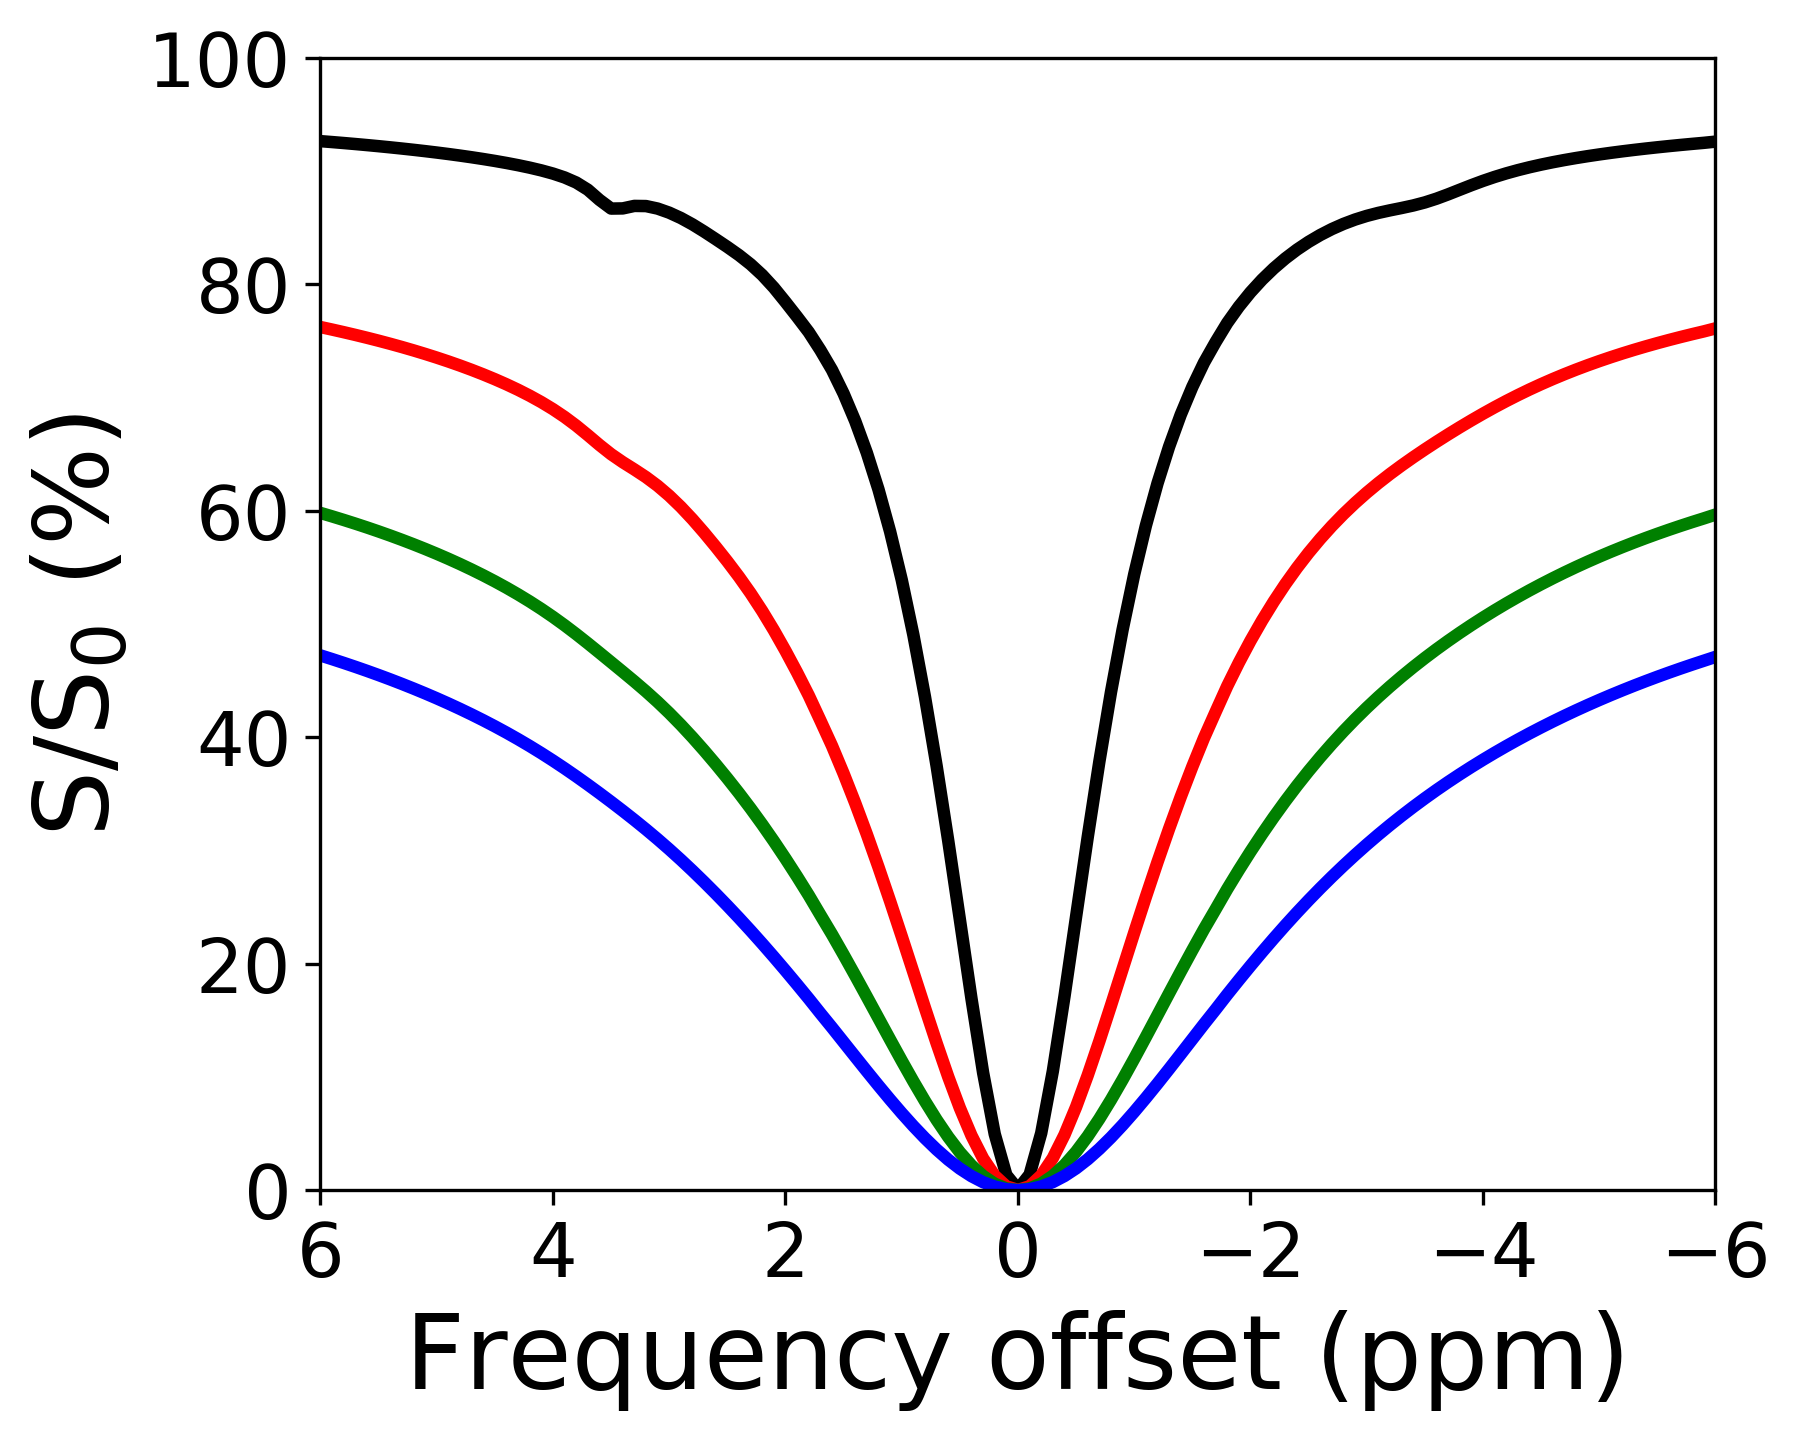

In [10]:
figure(figsize=(6,5),dpi=300)
plot(cestFreq,simulationMatrixCest[0]*100,'k-',linewidth=3, label=r'0.5 $\mu$T')
plot(cestFreq,simulationMatrixCest[1]*100,'r-',linewidth=3, label=r'1.0 $\mu$T')
plot(cestFreq,simulationMatrixCest[2]*100,'g-',linewidth=3, label=r'1.5 $\mu$T')
plot(cestFreq,simulationMatrixCest[3]*100,'b-',linewidth=3, label=r'2.0 $\mu$T')
xlim(cestFreq.max(), cestFreq.min())
ylim(0,100)
tick_params(labelsize=18)
# legend(loc='lower right',frameon=False, fontsize=18)
xlabel('Frequency offset (ppm)',fontsize=25)
xticks([6, 4, 2, 0, -2, -4, -6])
# xticks([6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6])
# xlabel(u'\u0394'+u'\u03C9',fontsize=15)
ylabel('S/S$_0$ (%)',fontsize=25)